## 常用Tensor操作

In [1]:
import torch as t
from __future__ import print_function

In [2]:
a = t.arange(0,6)
print(a)

tensor([0, 1, 2, 3, 4, 5])


In [5]:
print(a.view(2,3))      #view可以调整tensor形状，但不会改变自身的数据

print(a)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([0, 1, 2, 3, 4, 5])


In [11]:
b = a.view(2,3)
c = b.unsqueeze(1)    #在第一维上增加一个维度
print (c)

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


In [10]:
c.size()

torch.Size([2, 1, 3])

In [13]:
d = b.unsqueeze(-2)
print(d)

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


In [15]:
d.size()


torch.Size([2, 1, 3])

In [16]:
e = b.view(1, 1, 1, 2, 3)
print(e)

tensor([[[[[0, 1, 2],
           [3, 4, 5]]]]])


In [21]:
e.squeeze(0)

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [22]:
e.squeeze()      # 默认把所有维度为1的压缩

tensor([[0, 1, 2],
        [3, 4, 5]])

In [23]:
e.resize_(3,2)    #resize_用来调整size,可修改tensor尺寸

tensor([[0, 1],
        [2, 3],
        [4, 5]])

### Tensor类型

In [26]:
a = t.Tensor(2,3)
a

tensor([[1.2205e+23, 3.0820e-41, 8.4078e-45],
        [0.0000e+00, 1.4013e-45, 0.0000e+00]])

In [28]:
b = a.int()   #把原本为FloatTensor 转为IntTensor, 等价与 b = a.type(t.IntTensor)
b

tensor([[-2147483648,           0,           0],
        [          0,           0,           0]], dtype=torch.int32)

In [33]:
c = t.Tensor((1,))
c

tensor([1.])

In [37]:
d = t.ones(2, 3)
d.sum(dim = 0)


tensor([2., 2., 2.])

In [38]:
d.sum(dim = 0, keepdim = True)

tensor([[2., 2., 2.]])

pytorch支持自动广播法则

In [39]:
a = t.ones(3, 2)
b = t.zeros(2, 3, 1)
a + b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [40]:
#也可以手动实现广播法则
a.unsqueeze(0).expand(2, 3, 2) + b.expand(2, 3, 2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

### 线性回归

In [3]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [13]:
t.set_default_tensor_type('torch.FloatTensor')

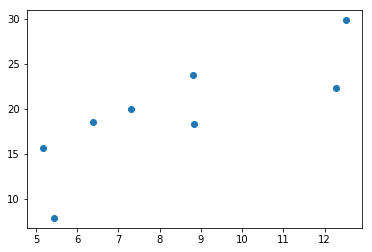

In [14]:
t.manual_seed(1000)

def get_fake_data(batch_size = 8):
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1))*3
    return x, y

x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

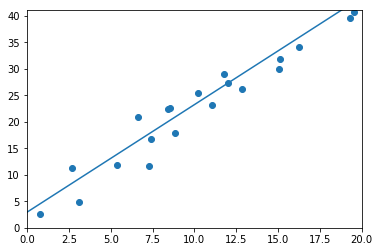

tensor(1.9614) tensor(2.9242)


/home/zilong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [20]:
#随机初始化参数
w = t.rand(1, 1)
b = t.zeros(1, 1)

lr = 0.001

for ii in range(20000):
    x, y = get_fake_data()
        
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y)** 2
    loss = loss.sum()
    
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    #更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%1000 == 0:
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1).type(t.FloatTensor)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size = 20)
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        
print(w.squeeze()[0], b.squeeze()[0])
    